In [ ]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount = True)

Mounted at /content/drive/


In [ ]:
#mounting the files from google drive to colab and renaming and reading them
path1 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/E1_train.csv'
path2 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/D2_train.csv'
path3 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/W3_train.csv'
path4 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/S4_train.csv'
path5 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/L5_train.csv'
path6 ='/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RS6_train.csv'
path7 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RL7_train.csv'
path8 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/G8_train.csv'
path9 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/I9_train.csv'
eating = pd.read_csv(path1)
drinking = pd.read_csv(path2)
walking = pd.read_csv(path3)
standing = pd.read_csv(path4)
lying = pd.read_csv(path5)
rs = pd.read_csv(path6)
rl = pd.read_csv(path7)
grooming = pd.read_csv(path8)
idle = pd.read_csv(path9)

#Data Exploration & Analysis

In [ ]:
#concatinating all the dataframes into a single dataframe and checking the number of rows and columns in the final dataframe
df = pd.concat([eating,drinking,walking,standing,lying,rs,rl,grooming,idle])
df.shape

(12263524, 11)

##Working with Sample df2

In [ ]:
#creating a dataframe 'df2' of 10000 records from the original dataframe df 
import random
df2 = df.sample(20000)

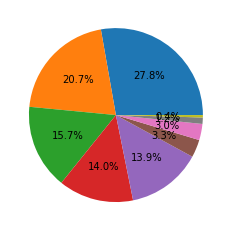

In [ ]:
#checking for the proportion of each feature in df2 and comparing it for similarity in proportion of each feature in df using piechart, using the feature ' label'
plt.pie(df['label'].value_counts(),autopct = '%1.1f%%');

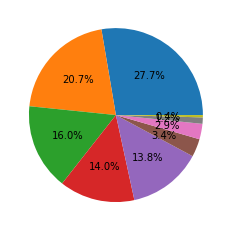

In [ ]:
plt.pie(df2['label'].value_counts(),autopct = '%1.1f%%');

**We find that the proportion of each feature in the new dataframe df2 is similar to that of the original dataframe df. Hence this sampling is good enough and we can select df1 to proceed with our model building exercise.**

**Data Visualisation and Analysis**

In [ ]:
#checking the shape of the dataframes df1
df2.shape

(20000, 11)

In [ ]:
#checking the top 5 rows of the new dataframe df2
df2.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
1797710,1628319099,0.015625,0.977051,-0.025391,-9.643555,-8.972168,7.629395,-429.0,1011.0,373.5,7
2458835,1628316951,-0.184082,0.991699,0.100098,-8.117676,-13.977051,4.272461,-132.0,115.5,262.5,1
1409861,1628307592,-0.098144,0.974121,0.151367,0.549316,-1.403809,-1.586914,-505.5,174.0,133.5,6
2392570,1628335182,0.201172,1.004395,-0.003418,0.549316,-11.718750,-0.183106,-507.0,1078.5,489.0,4
3026233,1628311322,-0.187012,0.975098,-0.076660,7.873535,-5.493164,-1.159668,-300.0,973.5,562.5,1


In [ ]:
#checking the bottom 5 rows of the new dataframe df2
df2.tail()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
1886165,1628319267,-0.247070,0.988770,0.037109,-33.935547,132.446289,17.028809,-507.0,193.5,211.5,4
1227957,1628315169,-0.229492,0.954102,0.055664,-2.014160,0.000000,0.366211,-69.0,-126.0,336.0,4
830666,1628100529,0.096680,0.981445,0.128906,-0.061035,-2.502441,0.122070,-516.0,103.5,51.0,5
1021741,1628096732,0.162109,1.005859,0.100098,-5.249023,8.117676,-0.183106,-564.0,127.5,88.5,7
217087,1628339062,-0.171387,0.964844,0.176758,-1.525879,1.647949,0.366211,-466.5,1431.0,562.5,4


In [ ]:
#checking the type of data under each feature of the dataframe df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1797710 to 217087
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    20000 non-null  int64  
 1   acc_x   20000 non-null  float64
 2   acc_y   20000 non-null  float64
 3   acc_z   20000 non-null  float64
 4   gyr_x   20000 non-null  float64
 5   gyr_y   20000 non-null  float64
 6   gyr_z   20000 non-null  float64
 7   mag_x   20000 non-null  float64
 8   mag_y   20000 non-null  float64
 9   mag_z   20000 non-null  float64
 10  label   20000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.8 MB


In [ ]:
#checking for any null values under each feature of the dataframe df2
df2.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

**We find that there are no missing values**

In [ ]:
#checking for the statistial parameters of the values under each feature of the dataframe df2
df2.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.628242e+09,-0.026735,0.620342,0.107923,1.010214,-1.737314,-0.588651,-294.455400,426.861300,201.191025,4.327600
std,1.207363e+05,0.261773,0.708751,0.186557,12.188202,20.436224,9.563774,273.767253,596.554232,438.555884,2.416706
min,1.628067e+09,-1.776367,-2.563965,-3.474609,-249.206543,-481.201172,-164.306641,-1215.000000,-985.500000,-883.500000,1.000000
25%,1.628104e+09,-0.217285,0.827637,0.029785,-2.014160,-5.676270,-2.563477,-466.500000,-49.500000,60.000000,1.000000
50%,1.628312e+09,-0.022949,0.936523,0.121826,0.854492,-1.892090,-0.549316,-256.500000,139.500000,311.250000,5.000000
75%,1.628335e+09,0.166016,0.973633,0.199707,3.723145,1.953125,1.464844,-127.500000,976.500000,552.000000,6.000000
max,1.628421e+09,1.118164,2.763184,1.631348,550.231934,518.493652,166.137695,564.000000,1611.000000,1045.500000,9.000000


In [ ]:
#the same statistical parameters in transpose format
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
time,20000.0,1.628242e+09,120736.264512,1.628067e+09,1.628104e+09,1.628312e+09,1.628335e+09,1.628421e+09
acc_x,20000.0,-2.673477e-02,0.261773,-1.776367e+00,-2.172852e-01,-2.294920e-02,1.660156e-01,1.118164e+00
acc_y,20000.0,6.203417e-01,0.708751,-2.563965e+00,8.276368e-01,9.365235e-01,9.736329e-01,2.763184e+00
acc_z,20000.0,1.079226e-01,0.186557,-3.474609e+00,2.978520e-02,1.218261e-01,1.997070e-01,1.631348e+00
gyr_x,20000.0,1.010214e+00,12.188202,-2.492065e+02,-2.014160e+00,8.544922e-01,3.723145e+00,5.502319e+02
gyr_y,20000.0,-1.737314e+00,20.436224,-4.812012e+02,-5.676270e+00,-1.892090e+00,1.953125e+00,5.184937e+02
gyr_z,20000.0,-5.886505e-01,9.563774,-1.643066e+02,-2.563477e+00,-5.493164e-01,1.464844e+00,1.661377e+02
mag_x,20000.0,-2.944554e+02,273.767253,-1.215000e+03,-4.665000e+02,-2.565000e+02,-1.275000e+02,5.640000e+02
mag_y,20000.0,4.268613e+02,596.554232,-9.855000e+02,-4.950000e+01,1.395000e+02,9.765000e+02,1.611000e+03
mag_z,20000.0,2.011910e+02,438.555884,-8.835000e+02,6.000000e+01,3.112500e+02,5.520000e+02,1.045500e+03


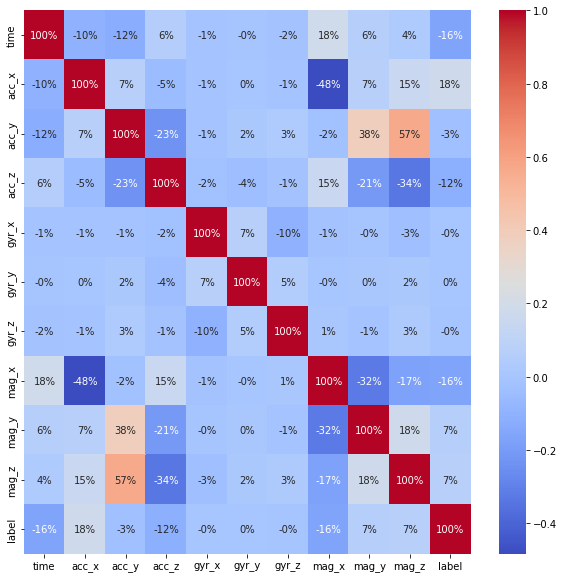

In [ ]:
#checking the correlation between all the features of df2 using heatmap
plt.figure(figsize=(10,10))
cor = df2.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

In [ ]:
#listing down the feature names in df2
list(df2)

['time',
 'acc_x',
 'acc_y',
 'acc_z',
 'gyr_x',
 'gyr_y',
 'gyr_z',
 'mag_x',
 'mag_y',
 'mag_z',
 'label']

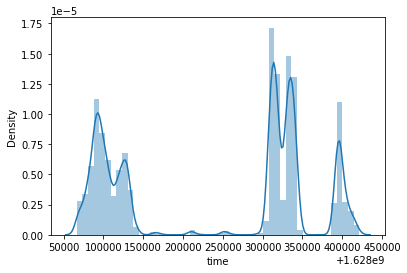

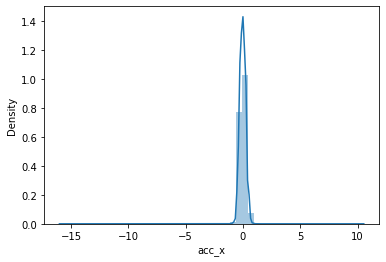

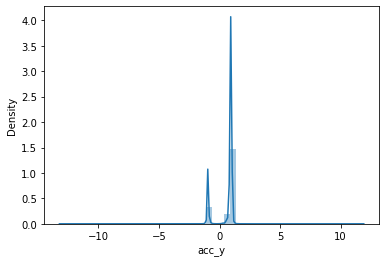

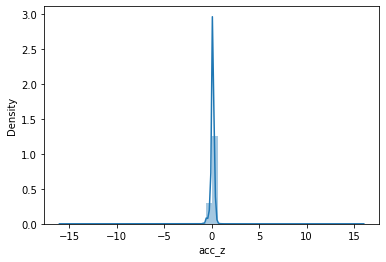

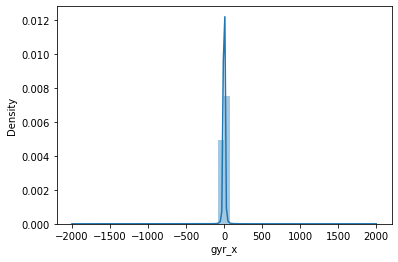

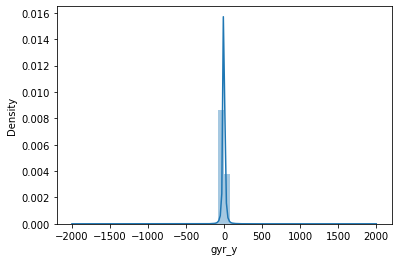

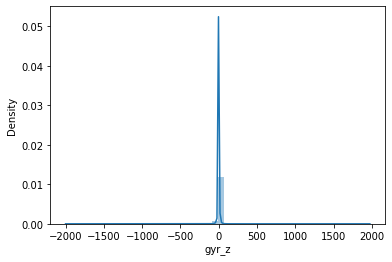

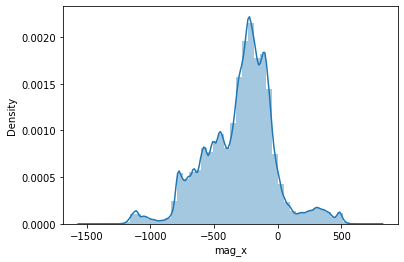

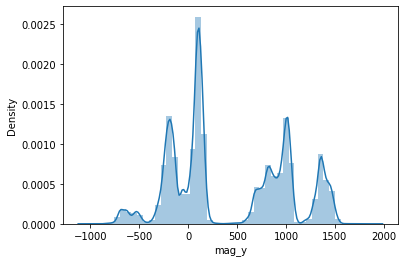

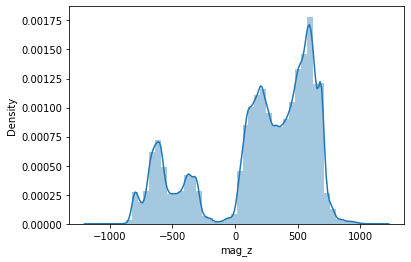

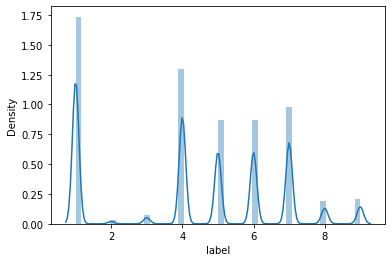

In [ ]:
#checking for the distibution of data under each feature in terms of skewness etc. using distribution plot
for column in df2.columns:
    plt.figure()             
    sns.distplot(df[column])

In [ ]:
#seperating the input and output variables into 2 different databases.
df2x = df2.drop(['label'],axis = 1)
df2x.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
1797710,1628319099,0.015625,0.977051,-0.025391,-9.643555,-8.972168,7.629395,-429.0,1011.0,373.5
2458835,1628316951,-0.184082,0.991699,0.100098,-8.117676,-13.977051,4.272461,-132.0,115.5,262.5
1409861,1628307592,-0.098144,0.974121,0.151367,0.549316,-1.403809,-1.586914,-505.5,174.0,133.5
2392570,1628335182,0.201172,1.004395,-0.003418,0.549316,-11.718750,-0.183106,-507.0,1078.5,489.0
3026233,1628311322,-0.187012,0.975098,-0.076660,7.873535,-5.493164,-1.159668,-300.0,973.5,562.5


In [ ]:
df2y = df2[['label']]
df2y.head()

,label
1797710,7
2458835,1
1409861,6
2392570,4
3026233,1


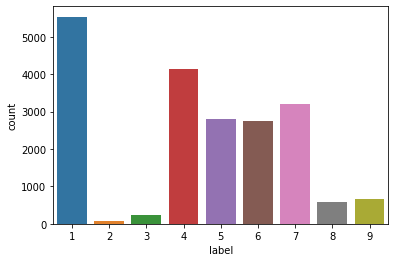

In [ ]:
#creating countplot to check the imbalance in the output variable
sns.countplot(df2y['label'])

#Outlier Identification and Treatment ( Using IQR Method)

In [ ]:
#giving a common name to all the features of datafram df2x, to call them in future
column_name = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z',]

In [ ]:
#creating a common function to identify outliers for each feature by drawing a box plot
def identify_outliers(df2x, column_name):
    fig = plt.figure(figsize=(4,2))
    sns.boxplot(data = df2x, y = column_name)
plt.show()

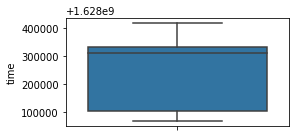

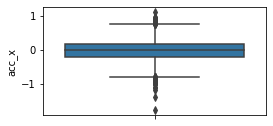

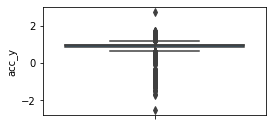

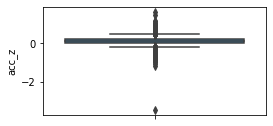

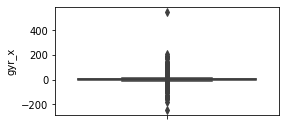

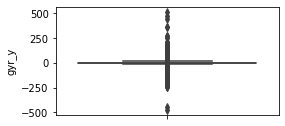

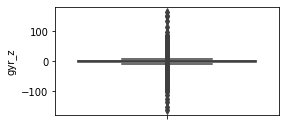

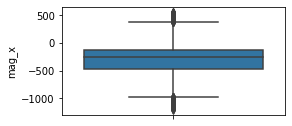

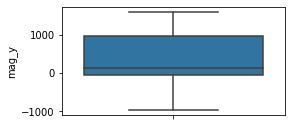

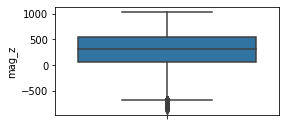

In [ ]:
#identifying the outliers for each feature by calling the common function
identify_outliers(df2x, 'time')
identify_outliers(df2x, 'acc_x')
identify_outliers(df2x, 'acc_y')
identify_outliers(df2x, 'acc_z')
identify_outliers(df2x, 'gyr_x')
identify_outliers(df2x, 'gyr_y')
identify_outliers(df2x, 'gyr_z')
identify_outliers(df2x, 'mag_x')
identify_outliers(df2x, 'mag_y')
identify_outliers(df2x, 'mag_z')

In [ ]:
#creating common function to replace outlier values with the median value and print boxplot thereafter to recheck the removal of outliers ; print upper and lower values of each feature 
#IQR
def replace_outliers(df2x, column_name):
        Q1 = np.percentile(df2x[column_name], 25)
        Q2 = np.percentile(df2x[column_name], 50)
        Q3 = np.percentile(df2x[column_name], 75)
        IQR = Q3 - Q1

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        df2x.loc[df2x[column_name] > upper_val, column_name] = np.median(df2x[column_name])
        df2x.loc[df2x[column_name] < lower_val, column_name] = np.median(df2x[column_name])
        
        fig = plt.figure(figsize = (4,2))
        sns.boxplot(data = df2x,y = column_name)
        plt.xticks(rotation = 'horizontal')
        plt.show()

upper 1628680899.5
lower 1627758549.5


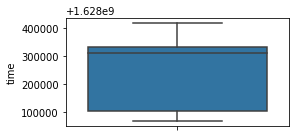

upper 0.7409668
lower -0.7922364


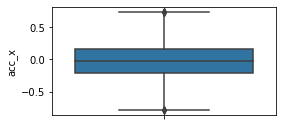

upper 1.19262705
lower 0.6086426500000002


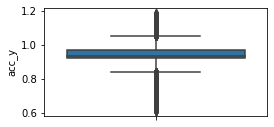

upper 0.4545897
lower -0.22509749999999995


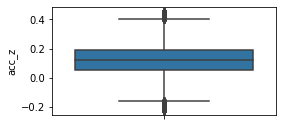

upper 12.329101399999999
lower -10.620116999999999


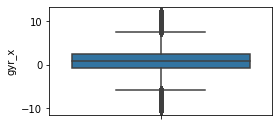

upper 13.39721675
lower -17.120361250000002


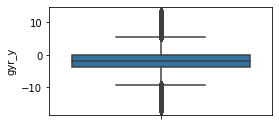

upper 7.507324000000001
lower -8.605956800000001


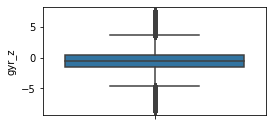

upper 381.0
lower -975.0


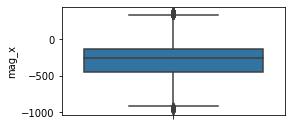

upper 2515.5
lower -1588.5


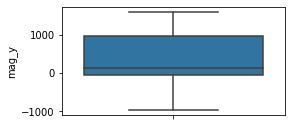

upper 1290.0
lower -678.0


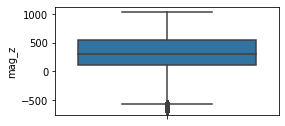

In [ ]:
#recalling the common function for replacing the outliers in each feature with median value and visualising using boxplot
replace_outliers(df2x, 'time')
replace_outliers(df2x, 'acc_x')
replace_outliers(df2x, 'acc_y')
replace_outliers(df2x, 'acc_z')
replace_outliers(df2x, 'gyr_x')
replace_outliers(df2x, 'gyr_y')
replace_outliers(df2x, 'gyr_z')
replace_outliers(df2x, 'mag_x')
replace_outliers(df2x, 'mag_y')
replace_outliers(df2x, 'mag_z')

#Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df2x_normalised = pd.DataFrame(scaling.fit_transform(df2x),columns = df2x.columns)
df2x_normalised.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.711734,0.526165,0.632020,0.293525,0.040107,0.266533,0.500000,0.402655,0.768920,0.610096
1,0.705680,0.395661,0.657167,0.478417,0.106952,0.102204,0.801527,0.621681,0.424032,0.545692
2,0.679305,0.451819,0.626991,0.553957,0.486631,0.515030,0.435115,0.346239,0.446563,0.470844
3,0.757058,0.647415,0.678961,0.325899,0.486631,0.176353,0.522901,0.345133,0.794916,0.677111
4,0.689817,0.393746,0.628667,0.217986,0.807487,0.380762,0.461832,0.497788,0.754477,0.719756


#Feature Selection - KBest using Chi2 tests

In [ ]:
#importing the KBest and Chi2 packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(df2x_normalised,df2y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(df2x_normalised.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features     k_score
0     time  940.273325
1    acc_x  255.570729
7    mag_x  175.434053
8    mag_y  136.217973
3    acc_z   68.554951
2    acc_y   62.404380
9    mag_z   43.392760
4    gyr_x    1.128435
5    gyr_y    0.687867
6    gyr_z    0.684788


time     1.303614
mag_y    0.421753
mag_x    0.290664
acc_x    0.281616
mag_z    0.211629
gyr_y    0.159022
gyr_z    0.157191
gyr_x    0.147541
acc_y    0.130596
acc_z    0.129696
dtype: float64


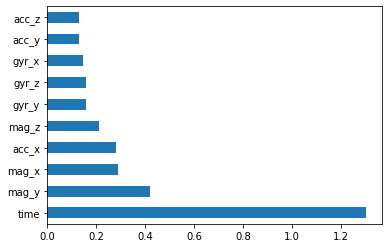

In [ ]:
#Feature Selection using Mutual Info. Classifier
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df2x_normalised, df2y)

mutual_data = pd.Series(mutual_info, index = df2x_normalised.columns)
mutual_data.sort_values(ascending = False)

print(mutual_data.nlargest(10))

mutual_data.nlargest(10).plot(kind = 'barh')
plt.show()

**From the above 2 methods of feature selection, we can find that the insignificant features are gyr_x, gyr_y, gyr_z , acc_y and mag_z. Hence we need to drop these features while we create the models**

In [ ]:
#dropping the insignificant features
df2x_normalised.drop(['acc_y','gyr_x','gyr_y','gyr_z','mag_z'],inplace = True, axis = 1)

In [ ]:
#checking if the insignificant features are dropped
df2x_normalised.head()

,time,acc_x,acc_z,mag_x,mag_y
0,0.711734,0.526165,0.293525,0.402655,0.768920
1,0.705680,0.395661,0.478417,0.621681,0.424032
2,0.679305,0.451819,0.553957,0.346239,0.446563
3,0.757058,0.647415,0.325899,0.345133,0.794916
4,0.689817,0.393746,0.217986,0.497788,0.754477


#Splitting the data into Training and Testing data

In [ ]:
#splitting the data into train and combined data(test data +validation data) in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(df2x_normalised,df2y,train_size=0.80, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((16000, 5), (4000, 5), (16000, 1), (4000, 1))

In [ ]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((2000, 5), (2000, 5), (2000, 1), (2000, 1))

#Build Model - Decision Tree Classifier for df2

In [ ]:
#model training on training data and predicting for test data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)

**Model Evaluation - Decision Tree**

In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[469   0   1  48   2  10  12   8   0]
 [  2   3   2   1   0   1   0   0   0]
 [  0   0  22   0   1   2   2   0   1]
 [ 14   0   0 310   3  35  15  12   0]
 [  5   0   1   8 257   5  27   0   4]
 [  9   0   0  13   1 235   1   5   0]
 [  0   0   0   2  22   1 300   2   1]
 [  6   1   3   9   0   2   1  34   1]
 [  0   0   0   0   1   1   2   0  64]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, y_pred))


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.80
Macro Recall: 0.77
Macro F1-score: 0.78

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

           1       0.93      0.85      0.89       550
           2       0.75      0.33      0.46         9
           3       0.76      0.79      0.77        28
           4       0.79      0.80      0.79       389
           5       0.90      0.84      0.87       307
           6       0.80      0.89      0.85       264
           7       0.83      0.91      0.87       328
           8       0.56      0.60      0.58        57
           9       0.90      0.94      0.92        68

    accuracy                           0.85      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.85      0.85      0.85      2000



#Build Model - Linear Regression for df2

In [ ]:
#splitting the data into train and combined data(test data +validation data) in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(df2x_normalised,df2y,train_size=0.80, random_state=0)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((16000, 5), (4000, 5), (16000, 1), (4000, 1))

In [ ]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=0)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((2000, 5), (2000, 5), (2000, 1), (2000, 1))

In [ ]:
#model training on training data and predicting for test data
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,Y_train)
y_pred = LG.predict(X_test)

**Model Evaluation - Logistic Regression**

In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[320   0   0 181  28   7  19   0   2]
 [  3   0   0   0   0   0   2   0   0]
 [ 13   0   0   2   5   2   2   0   0]
 [147   0   0 235  16   3  12   0   0]
 [ 55   0   0  27  85   0 107   0   1]
 [ 88   0   0 113   0  37  10   0   1]
 [ 81   0   0  33  74   0 157   0   0]
 [ 34   0   0  32   2   0   0   0   0]
 [ 30   0   0   4   1   0   1   0  28]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, y_pred))


Accuracy: 0.43

Micro Precision: 0.43
Micro Recall: 0.43
Micro F1-score: 0.43

Macro Precision: 0.37
Macro Recall: 0.28
Macro F1-score: 0.29

Weighted Precision: 0.46
Weighted Recall: 0.43
Weighted F1-score: 0.41

Classification Report

              precision    recall  f1-score   support

           1       0.42      0.57      0.48       557
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        24
           4       0.37      0.57      0.45       413
           5       0.40      0.31      0.35       275
           6       0.76      0.15      0.25       249
           7       0.51      0.46      0.48       345
           8       0.00      0.00      0.00        68
           9       0.88      0.44      0.58        64

    accuracy                           0.43      2000
   macro avg       0.37      0.28      0.29      2000
weighted avg       0.46      0.43      0.41      2000



#Checking if the evaluation parameter scores can be bettered using SMOTE

*SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.*

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#checking the count of each 'label' in Y_train 
df2y , count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = { k:v for (k,v) in zip(df2x_normalised , count)}
Y_train_dict_value_count

{1: 4413, 2: 76, 3: 194, 4: 3317, 5: 2247, 6: 2236, 7: 2519, 8: 453, 9: 545}

In [ ]:
#importing the SMOTE package and fitting the same for the test and train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)

X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [ ]:
#checking the count of each 'label' in Y_train after SMOTE
df2y , count = np.unique(Y_train_smote,return_counts = True)
Y_train_smote_value_count = { k:v for (k,v) in zip(df2x_normalised , count)}
Y_train_smote_value_count

{1: 4413,
 2: 4413,
 3: 4413,
 4: 4413,
 5: 4413,
 6: 4413,
 7: 4413,
 8: 4413,
 9: 4413}

#Model Building using Decision Tree after SMOTE 

In [ ]:
#model training on training data and predicting for test data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
dtc.fit(X_train_smote,Y_train_smote)
Y_pred = dtc.predict(X_test)

Evaluating the model built on SVC , after SMOTE is done


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[397   0   6 101   5  22   2  24   0]
 [  0   4   1   0   0   0   0   0   0]
 [  0   2  17   1   2   1   0   1   0]
 [ 13   0   3 318   4  23  23  29   0]
 [  1   0   4   7 188   7  60   3   5]
 [  4   1   1  72   1 157   4   9   0]
 [  4   1   0   2  41  10 279   7   1]
 [  8   5   1   4   1   1   0  48   0]
 [  0   0   0   2   1   0   1   2  58]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.66
Macro Recall: 0.75
Macro F1-score: 0.68

Weighted Precision: 0.76
Weighted Recall: 0.73
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

           1       0.93      0.71      0.81       557
           2       0.31      0.80      0.44         5
           3       0.52      0.71      0.60        24
           4       0.63      0.77      0.69       413
           5       0.77      0.68      0.73       275
           6       0.71      0.63      0.67       249
           7       0.76      0.81      0.78       345
           8       0.39      0.71      0.50        68
           9       0.91      0.91      0.91        64

    accuracy                           0.73      2000
   macro avg       0.66      0.75      0.68      2000
weighted avg       0.76      0.73      0.74      2000



#Model Building using Linear Regression after SMOTE 

In [ ]:
#model training on training data and predicting for test data
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train_smote,Y_train_smote)
y_pred = LG.predict(X_test)

**Model Evaluation - Random Forest - After SMOTE

In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and Y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[397   0   6 101   5  22   2  24   0]
 [  0   4   1   0   0   0   0   0   0]
 [  0   2  17   1   2   1   0   1   0]
 [ 13   0   3 318   4  23  23  29   0]
 [  1   0   4   7 188   7  60   3   5]
 [  4   1   1  72   1 157   4   9   0]
 [  4   1   0   2  41  10 279   7   1]
 [  8   5   1   4   1   1   0  48   0]
 [  0   0   0   2   1   0   1   2  58]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.66
Macro Recall: 0.75
Macro F1-score: 0.68

Weighted Precision: 0.76
Weighted Recall: 0.73
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

           1       0.93      0.71      0.81       557
           2       0.31      0.80      0.44         5
           3       0.52      0.71      0.60        24
           4       0.63      0.77      0.69       413
           5       0.77      0.68      0.73       275
           6       0.71      0.63      0.67       249
           7       0.76      0.81      0.78       345
           8       0.39      0.71      0.50        68
           9       0.91      0.91      0.91        64

    accuracy                           0.73      2000
   macro avg       0.66      0.75      0.68      2000
weighted avg       0.76      0.73      0.74      2000

